C:\Users\iamky\AppData\Local\Temp\ipykernel_14900\729052996.py:28: RuntimeWarning: overflow encountered in scalar multiply
  balance[i] = balance[i-1] * daily_interest[i]
C:\Users\iamky\AppData\Local\Temp\ipykernel_14900\729052996.py:41: RuntimeWarning: invalid value encountered in scalar subtract
  balance[i] -= payment


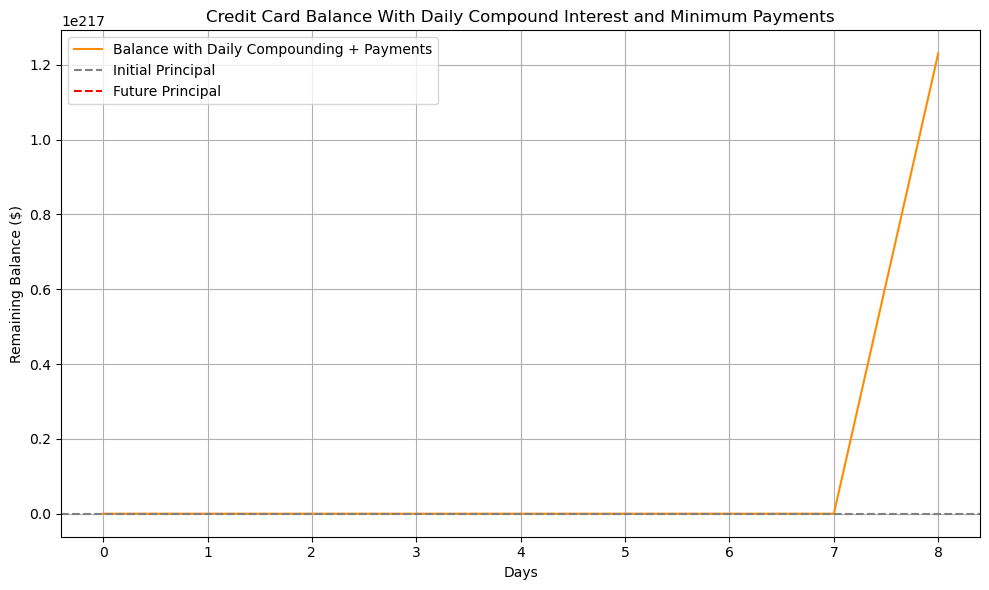

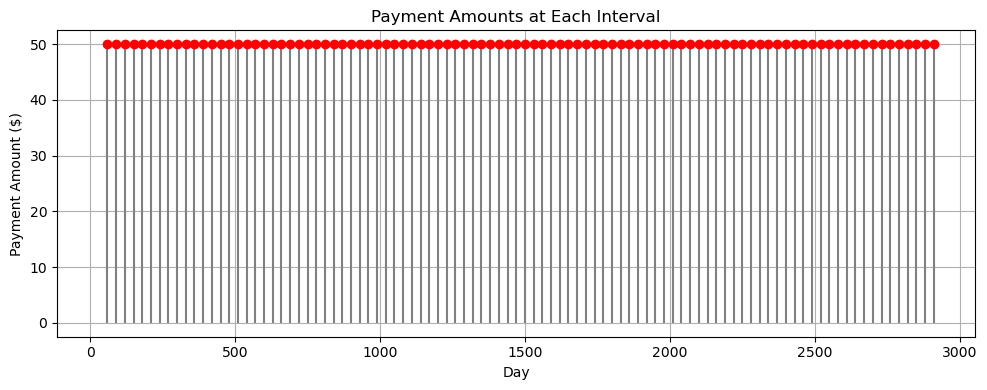

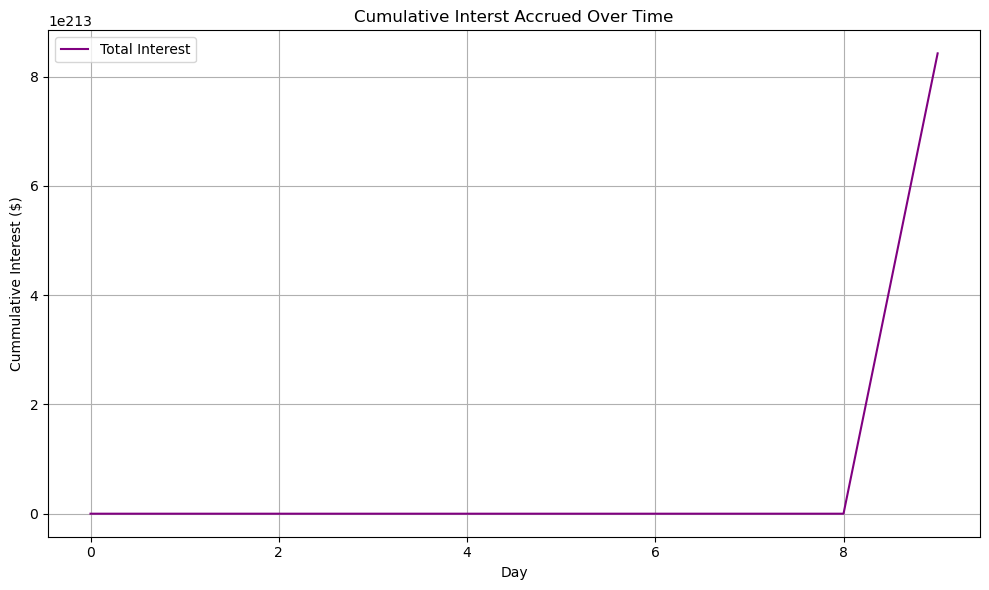

Initial Principal Value at Day 0: $16000.00
Final Principal Value at Day 2920: $nan
Cumulative Interest at Day 2920: $nan


In [76]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_credit_card(principal, apr, 
                         total_days=365*8,            # simulation length (days)
                         payment_interval=30,       # Payment interval (days)
                         min_payment_fixed=25,      # minimum payments floor
                         payment_perc_coef = 0.001   # Minimum payment rule coef.
                    ):
    """Simulate credit card balance and payments over time."""
    # Initialize
    daily_rate = apr / 365          # Daily interest rate
    days = np.arange(0, total_days + 1)
    balance = np.zeros_like(days, dtype=float)
    payments = np.zeros_like(days, dtype=float)
    daily_interest = np.zeros_like(days, dtype=float)
    cumulative_interest = np.zeros_like(days, dtype=float)

    balance[0] =  principal    

    # Simulate day by day
    for i in range(1, len(days)):
        # Interest accrued
        daily_interest[i] = balance[i-1] * daily_rate
        cumulative_interest[i] = cumulative_interest[i - 1] + daily_interest[i]
        
        # Apply daily interest
        balance[i] = balance[i-1] * daily_interest[i]

        # Make a payment every `payment interval` days
        if i % payment_interval == 0:
            # Interest from last interval
            interest_period = cumulative_interest[i] - cumulative_interest[i - payment_interval]

            # Minimum payment rule
            percent_based = payment_perc_coef * balance[i] + interest_period
            payment = max(min_payment_fixed, percent_based)

            # Cap payment
            payment = min(payment, balance[i])
            balance[i] -= payment
            payments[i] += payment
    
    return days, balance, payments, cumulative_interest

# parameters
principal1 = 6000.0             # initial balance
apr1 = 0.15                      # Annual Perecentage Rate (APR)

principal2 = 10000.0
apr2 = 0.25

# Simulate multiple accounts

days1, balance1, payments1, interest1 = simulate_credit_card(principal1, apr1)
days2, balance2, payments2, interest2 = simulate_credit_card(principal2, apr2)

# Combine results
total_principal = principal1 + principal2
total_balance = balance1 + balance2
total_payments = payments1 + payments2
total_interest = interest1 + interest2

# Balance Plot
plt.figure(figsize=(10,6))
plt.plot(days1, total_balance, label="Balance with Daily Compounding + Payments", color='darkorange')
plt.axhline(total_principal, color='gray', linestyle='--', label="Initial Principal")
plt.axhline(total_balance[-1], color='red', linestyle='--', label="Future Principal")
plt.xlabel("Days")
plt.ylabel("Remaining Balance ($)")
plt.title("Credit Card Balance With Daily Compound Interest and Minimum Payments")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Payment Stem Plot
payment_days = days1[total_payments > 0]
payment_values = total_payments[total_payments > 0]

plt.figure(figsize=(10,4))
plt.stem(payment_days, payment_values, linefmt='gray', markerfmt='ro', basefmt=" ")
plt.xlabel("Day")
#plt.xticks(payment_days)
plt.ylabel("Payment Amount ($)")
plt.title("Payment Amounts at Each Interval")
plt.grid(True)
plt.tight_layout()
plt.show()

# Cumulative Interest Plot
plt.figure(figsize=(10,6))
plt.plot(days1, total_interest, label="Total Interest", color="purple")
plt.xlabel("Day")
plt.ylabel("Cummulative Interest ($)")
plt.title("Cumulative Interst Accrued Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print
print(f"Initial Principal Value at Day 0: ${total_balance[0]:.2f}")
print(f"Final Principal Value at Day {days1[-1]}: ${total_balance[-1]:.2f}")
print(f"Cumulative Interest at Day {days1[-1]}: ${total_interest[-1]:.2f}")

zero_indices = np.where(total_balance==0)[0] #get index when balance equal $0)
if zero_indices.size > 0: # Print out Day when balance equals $0
    print(f"***Balance paid off at Day {days1[zero_indices[0]]}.***")